In [7]:
import geopandas as gpd
import pandas as pd
# Load and join GMCA housing, industrial and office supply data
housing_supply_gdf = gpd.read_file("data/gmca_data/2024 GM Housing Land Supply GIS.shp")
industrial_supply_gdf = gpd.read_file("data/gmca_data/2024 GM Industrial-warehousing Land Supply GIS.shp")
offices_supply_gdf = gpd.read_file("data/gmca_data/2024 GM Offices Land Supply GIS.shp")
total_supply_gdf = pd.concat([housing_supply_gdf, industrial_supply_gdf, offices_supply_gdf])
# Load and tidy GMEU Sites of Biological Importance data
sbi_gdf = gpd.read_file("data/gmeu_data/gm_sbi.shp")
sbi_gdf["Category"] = "Site of Biological Importance"
sbi_gdf = sbi_gdf.rename(columns = {"district": "LAName", "site_nam": "SiteRef"})
# Join GMCA and GMEU data
full_data_gdf = pd.concat([total_supply_gdf, sbi_gdf[["SiteRef", "LAName", "Category", "geometry"]]])

In [11]:
full_data_gdf["centroid"] = full_data_gdf.centroid

In [ ]:
# Sites of Biological Importance (SBI) shapefile loaded, and a "Category" column added, and renamed columns for consistency
sbi_gdf = gpd.read_file("data/gmeu_data/gm_sbi.shp")
sbi_gdf["Category"] = "Site of Biological Importance"
sbi_gdf = sbi_gdf.rename(columns = {"district": "LAName", "site_nam": "SiteRef"})
sbi_gdf.head()



,SiteRef,site_id,cent_gr,site_gra,LAName,features,date_est,geometry,Category
0,Big Wood,A10,SD534102,A,Wigan,Ancient Woodland (Wd1),1980-06-18,"POLYGON ((353649.752 410536.46, 353660.55 4105...",Site of Biological Importance
1,Winstanley Hall Woods,A12,SD544033,B,Wigan,Woodland (Wd1); Plantation Woodland (Wd2),1981-07-01,"MULTIPOLYGON (((354300.461 403639.988, 354318....",Site of Biological Importance
2,Ackhurst Lane Sand Workings,A14,SD542070,C,Wigan,Urban (Ur1),1986-11-21,"POLYGON ((354320.268 407088.639, 354329.097 40...",Site of Biological Importance
3,Abbey Lakes,A2,SD526047,C,Wigan,Woodland (Wd1); Open Water (Fw3),1980-06-12,"POLYGON ((352622.159 404628.83, 352625.623 404...",Site of Biological Importance
4,Wetland by M6,A20,SD545117,B,Wigan,Ponds & Small Lodges (Fw2); Swamp (Fw1),1988-05-05,"MULTIPOLYGON (((354408.45 411806.416, 354430.9...",Site of Biological Importance


In [13]:
full_data_gdf

,Category,LAName,SiteRef,geometry,centroid
0,Housing,Bury,HL/0414/00,"POLYGON ((379112.8 410310.51, 379117.56 410306...",POINT (379114.012 410213.116)
1,Housing,Bury,HL/1172/00,"POLYGON ((377973.95 414475.81, 377979.24 41446...",POINT (377947.835 414384.462)
2,Housing,Bury,HL/1981/00,"POLYGON ((380839 413359.78, 380838.6 413361.95...",POINT (380885.718 413390.494)
3,Housing,Bury,HL/2004/00,"POLYGON ((378834 407567.1, 378840 407566.81, 3...",POINT (378852.408 407559.6)
4,Housing,Bury,HL/2127/00,"POLYGON ((379113.7 410329.59, 379114.66 410328...",POINT (379117.39 410313.26)
...,...,...,...,...,...
531,Site of Biological Importance,Tameside,Mill Race & Pasture at Haughton Dale,"MULTIPOLYGON (((393687.128 393384.895, 393682....",POINT (393841.341 393512.227)
532,Site of Biological Importance,Wigan,Three Sisters,"POLYGON ((357928.939 401185.293, 357957.618 40...",POINT (358367.769 401012.636)
533,Site of Biological Importance,Manchester,Nan Nook Wood,"POLYGON ((381158.403 390125.048, 381156.853 39...",POINT (380888.856 390037.976)
534,Site of Biological Importance,Manchester,Big Wood,"MULTIPOLYGON (((383512.797 386267.952, 383512....",POINT (383309.435 386406.658)


In [ ]:
# Calculate the centroid of each site for distance calculations
full_data_gdf["centroid"] = full_data_gdf.geometry.centroid

In [15]:
# Split the data into SBIs and non-SBIs
SBIs = full_data_gdf[full_data_gdf["Category"] == "Site of Biological Importance"]
non_SBIs = full_data_gdf[full_data_gdf["Category"] != "Site of Biological Importance"]

In [ ]:
# Loop through each SBI, calculate the distance from its centroid to all non-SBI centroids, and count how many are within 500m

from shapely.geometry import Point

# Ensure both SBIs and non_SBIs have a 'centroid' column of Point geometries
sbi_centroids = SBIs['centroid']
non_sbi_centroids = non_SBIs['centroid']

# Calculate for each SBI how many non-SBIs are within 500m
within_500m_counts = []
for sbi_idx, sbi_centroid in sbi_centroids.items():
	count = non_sbi_centroids.distance(sbi_centroid).lt(500).sum()
	within_500m_counts.append(count)

# Show all 500 meters results
within_500m_counts

[np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(4),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(4),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(5),
 np.int64(0),
 np.int64(3),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(6),
 np.int64(4),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(4),
 np.int64(2),
 np.int64(7),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(5),
 np.int64(2),
 np.int64(10),
 np.int64(0),
 np.int64(3),
 np.i

In [18]:
import pandas as pd

# Convert the results to a pandas Series for better display
within_500m_series = pd.Series(within_500m_counts, name="Non-SBIs within 500m")
within_500m_series
# Or, to see as a DataFrame with the SBI index:
# pd.DataFrame({"SBI_Index": SBIs.index, "Non-SBIs within 500m": within_500m_counts})
# ...existing code...

0      0
1      0
2      1
3      0
4      0
      ..
531    2
532    0
533    2
534    0
535    1
Name: Non-SBIs within 500m, Length: 536, dtype: int64

In [19]:
# Example bin edges and labels
bins = [-1, 0, 2, 5, float('inf')]
labels = ['Low', 'Moderate', 'High', 'Very High']

# Create a DataFrame with the counts
sensitivity_df = pd.DataFrame({
    "Non-SBIs within 500m": within_500m_counts
})

# Bin the counts into sensitivity categories
sensitivity_df["Sensitivity"] = pd.cut(
    sensitivity_df["Non-SBIs within 500m"],
    bins=bins,
    labels=labels
)

sensitivity_df

,Non-SBIs within 500m,Sensitivity
0,0,Low
1,0,Low
2,1,Moderate
3,0,Low
4,0,Low
...,...,...
531,2,Moderate
532,0,Low
533,2,Moderate
534,0,Low


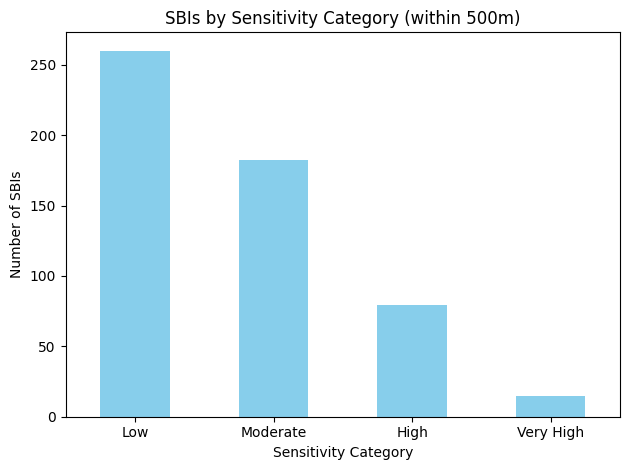

In [20]:
import matplotlib.pyplot as plt

# Count SBIs in each sensitivity category
category_counts = sensitivity_df["Sensitivity"].value_counts().sort_index()

# Plot as a bar chart
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sensitivity Category')
plt.ylabel('Number of SBIs')
plt.title('SBIs by Sensitivity Category (within 500m)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
# Calculate for each SBI how many non-SBIs are within 1 km (1000 meters)
within_1km_counts = []
for sbi_idx, sbi_centroid in sbi_centroids.items():
    count = non_sbi_centroids.distance(sbi_centroid).lt(1000).sum()
    within_1km_counts.append(count)

# Create a DataFrame and bin the results (adjust bins/labels as needed)
bins_1km = [-1, 0, 2, 5, float('inf')]
labels_1km = ['Low', 'Moderate', 'High', 'Very High']

sensitivity_1km_df = pd.DataFrame({
    "Non-SBIs within 1km": within_1km_counts
})
sensitivity_1km_df["Sensitivity"] = pd.cut(
    sensitivity_1km_df["Non-SBIs within 1km"],
    bins=bins_1km,
    labels=labels_1km
)

sensitivity_1km_df

,Non-SBIs within 1km,Sensitivity
0,0,Low
1,1,Moderate
2,3,High
3,6,Very High
4,1,Moderate
...,...,...
531,8,Very High
532,2,Moderate
533,7,Very High
534,10,Very High


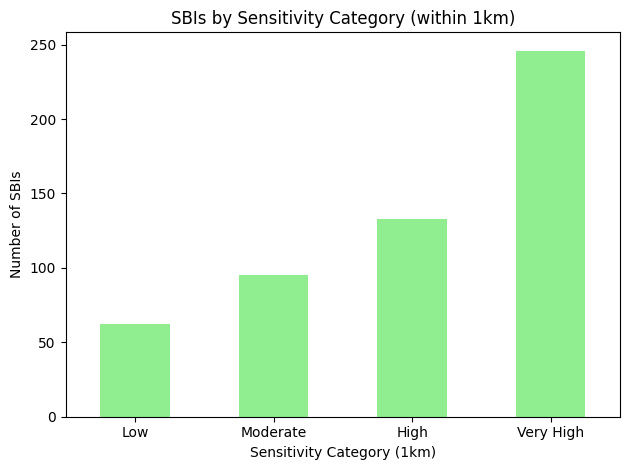

In [22]:
# Count SBIs in each 1km sensitivity category
category_counts_1km = sensitivity_1km_df["Sensitivity"].value_counts().sort_index()

# Plot as a bar chart
category_counts_1km.plot(kind='bar', color='lightgreen')
plt.xlabel('Sensitivity Category (1km)')
plt.ylabel('Number of SBIs')
plt.title('SBIs by Sensitivity Category (within 1km)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()